Install dipendecies

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

Load dataset

In [55]:
df = pd.read_csv("../data/togo-dapaong_qc.csv")

In [3]:
# display the first 10 rows of the dataset
df.head(5)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


Summary Statistics & Missing-Value Report

In [4]:
# Overview of numeric columns
print("The description of the numeric columns:")
print(df.describe())

The description of the numeric columns:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      230.555040     151.258469     116.444352     226.144375   
std       322.532347     250.956962     156.520714     317.346938   
min       -12.700000       0.000000       0.000000       0.000000   
25%        -2.200000       0.000000       0.000000       0.000000   
50%         2.100000       0.000000       2.500000       4.400000   
75%       442.400000     246.400000     215.700000     422.525000   
max      1424.000000    1004.500000     805.700000    1380.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      219.568588      27.751788      55.013160       2.368093   
std       307.932510       4.758023      28.778732       1.462668   
min         0.000000      14.900000       3.300000       0.000

In [5]:
# Check for missing values
print("Check for missing values:")
print(df.isna().sum())

Check for missing values:
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [6]:
# Calculate percentage of missing values per column
null_percent = df.isna().sum() / len(df) * 100

# Filter columns with more than 5% nulls
columns_with_many_nulls = null_percent[null_percent > 5]

# Display them
print(columns_with_many_nulls)

Comments    100.0
dtype: float64


Outlier Detection & Basic Cleaning

Outlier detection

In [7]:
# Identify numeric columns
numeric_cols = ["GHI", "DNI", "DHI"]

# Compute Z-scores and flag outliers (|Z| > 3)
z_scores = np.abs(stats.zscore(df[numeric_cols]))
outlier_flags = (z_scores > 3).any(axis=1)
print(f"Number of outlier samples flagged: {outlier_flags.sum()}")

Number of outlier samples flagged: 4714


In [8]:
# Identify numeric columns
numeric_cols = ["ModA", "ModB", "WS", "WSgust"]

# Compute Z-scores and flag outliers (|Z| > 3)
z_scores = np.abs(stats.zscore(df[numeric_cols]))
outlier_flags = (z_scores > 3).any(axis=1)
print(f"Number of outlier samples flagged: {outlier_flags.sum()}")

Number of outlier samples flagged: 4763


In [57]:
# Identify numeric columns
numeric_cols = ["GHI", "DNI", "DHI", "ModA", "ModB", "WS", "WSgust"]

# Compute Z-scores and flag outliers (|Z| > 3)
z_scores = np.abs(stats.zscore(df[numeric_cols]))
outlier_flags = (z_scores > 3).any(axis=1)
print(f"Number of outlier samples flagged: {outlier_flags.sum()}")

Number of outlier samples flagged: 9251


In [58]:
# Report outliers per column
for idx, col in enumerate(numeric_cols):
    outliers = (z_scores[:, idx] > 3)
    count = np.sum(outliers)
    print(f"{col}: {count} outliers")

GHI: 305 outliers
DNI: 1062 outliers
DHI: 3415 outliers
ModA: 137 outliers
ModB: 206 outliers
WS: 3510 outliers
WSgust: 3915 outliers


In [59]:
# Check for missing values in key columns
key_columns = ["GHI", "DNI", "DHI", "ModA", "ModB", "WS", "WSgust"]
missing_report = df[key_columns].isna().sum()
print("Missing values in key columns:")
print(missing_report)

Missing values in key columns:
GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64


Basic Cleaning

In [92]:
# Handling outliers using imputation
for col in numeric_cols:
    df.loc[outlier_flags, col] = df[col].median()

In [93]:
# Identify numeric columns
numeric_cols = ["GHI", "DNI", "DHI", "ModA", "ModB", "WS", "WSgust"]

# Compute Z-scores and flag outliers (|Z| > 3)
z_scores = np.abs(stats.zscore(df[numeric_cols]))
outlier_flags = (z_scores > 3).any(axis=1)
print(f"Number of outlier samples flagged: {outlier_flags.sum()}")

Number of outlier samples flagged: 471


In [94]:
# Report outliers per column
for idx, col in enumerate(numeric_cols):
    outliers = (z_scores[:, idx] > 3)
    count = np.sum(outliers)
    print(f"{col}: {count} outliers")

GHI: 36 outliers
DNI: 366 outliers
DHI: 56 outliers
ModA: 0 outliers
ModB: 16 outliers
WS: 0 outliers
WSgust: 0 outliers


In [95]:
# Convert Timestamp to Datetime Format
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

In [96]:
# Drop unused collumn (comments)
df_cleaned = df.drop(columns=["Comments"])

In [97]:
df_cleaned.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
0,2021-10-25 00:01:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4
1,2021-10-25 00:02:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4
2,2021-10-25 00:03:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4
3,2021-10-25 00:04:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4
4,2021-10-25 00:05:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4


In [98]:
# Export cleaned dataframe
df_cleaned.to_csv("../data/togo_clean.csv", index=False)

Time Series Analysis

In [99]:
# Load cleaned data
df = pd.read_csv("../data/togo_clean.csv")

In [100]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

In [101]:
# Sort by Timestamp
df = df.sort_values("Timestamp")

C:\Users\Wubishet\AppData\Local\Temp\ipykernel_10252\1321632256.py:14: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\Wubishet\3D Objects\solar-challenge-week1\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


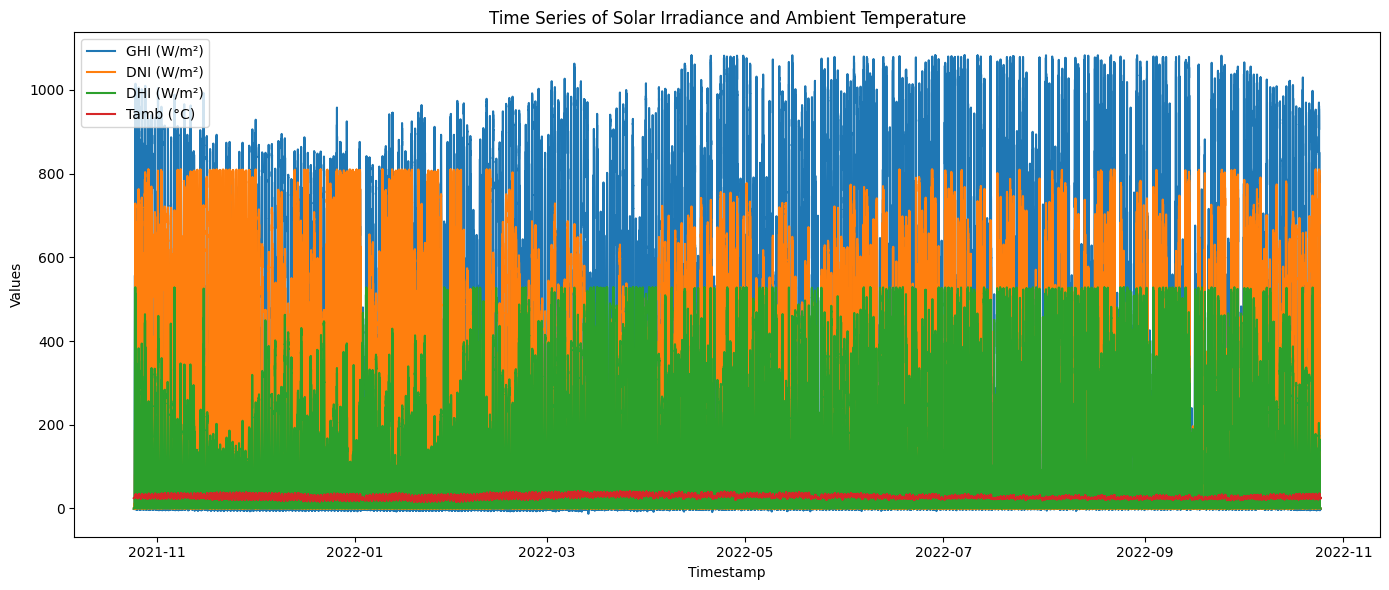

In [102]:
# Plot Time Series – Line Charts
import matplotlib.pyplot as plt

# Set the figure size and style
plt.figure(figsize=(14, 6))
plt.plot(df["Timestamp"], df["GHI"], label="GHI (W/m²)")
plt.plot(df["Timestamp"], df["DNI"], label="DNI (W/m²)")
plt.plot(df["Timestamp"], df["DHI"], label="DHI (W/m²)")
plt.plot(df["Timestamp"], df["Tamb"], label="Tamb (°C)")
plt.xlabel("Timestamp")
plt.ylabel("Values")
plt.title("Time Series of Solar Irradiance and Ambient Temperature")
plt.legend()
plt.tight_layout()
plt.show()

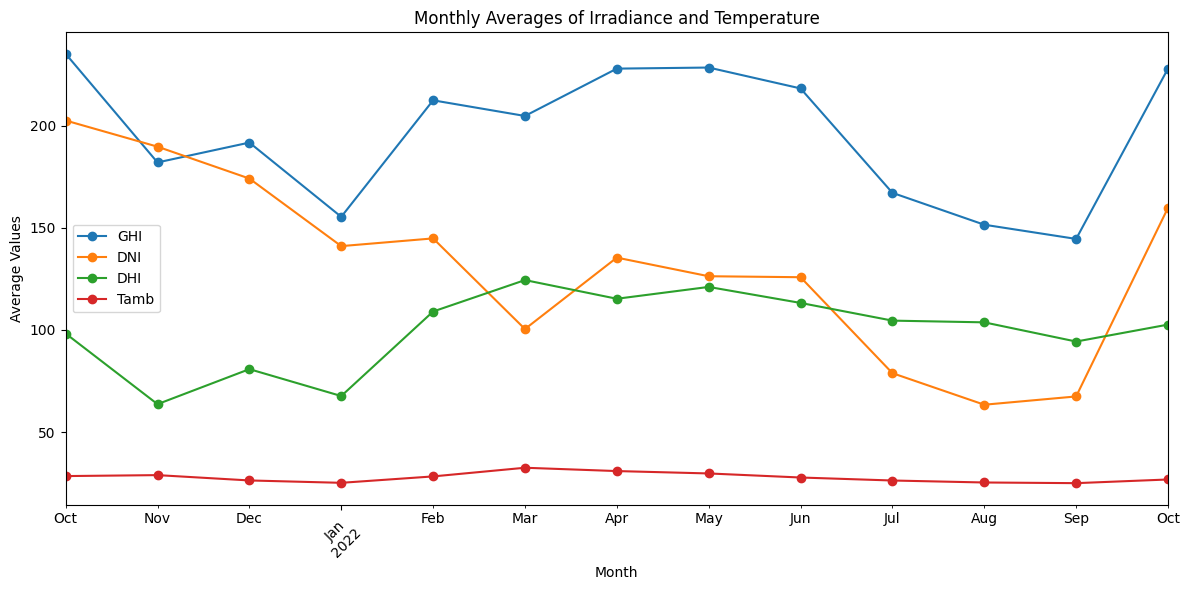

In [103]:
# Plot Monthly Averages
df["Month"] = df["Timestamp"].dt.to_period("M")

monthly_avg = df.groupby("Month")[["GHI", "DNI", "DHI", "Tamb"]].mean()

monthly_avg.plot(figsize=(12, 6), marker='o')
plt.title("Monthly Averages of Irradiance and Temperature")
plt.ylabel("Average Values")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

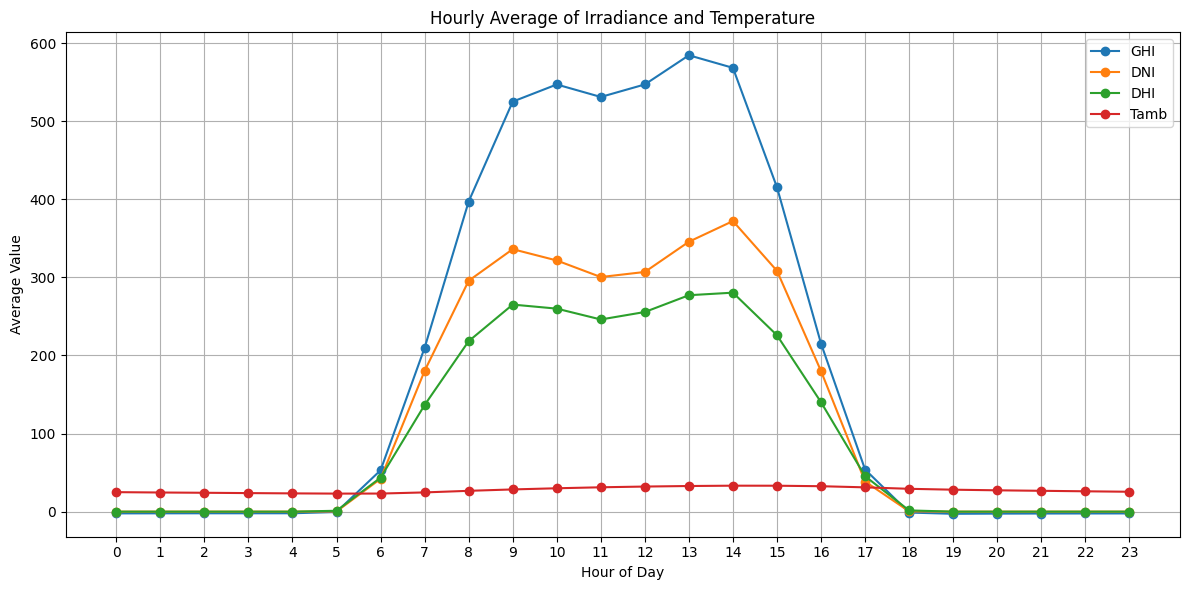

In [104]:
# Hourly Trends Daily Cycle Analysis
df["Hour"] = df["Timestamp"].dt.hour
hourly_avg = df.groupby("Hour")[["GHI", "DNI", "DHI", "Tamb"]].mean()

hourly_avg.plot(figsize=(12, 6), marker='o')
plt.title("Hourly Average of Irradiance and Temperature")
plt.xlabel("Hour of Day")
plt.ylabel("Average Value")
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()

In [105]:
# Detect Anomalies: Sudden Peaks or Drops
ghi_peaks = df[df["GHI"] > 1200]
temp_spikes = df[df["Tamb"] > 45]

print(f"Extreme GHI peaks: {ghi_peaks.shape[0]}")
print(f"Unusual high temperatures: {temp_spikes.shape[0]}")

Extreme GHI peaks: 0
Unusual high temperatures: 0


Cleaning Impact

In [106]:
# Ensure Cleaning Column is Binary and Valid
print(df["Cleaning"].value_counts())

Cleaning
0    525319
1       281
Name: count, dtype: int64


In [107]:
# Group by Cleaning Flag and Compute Averages
mod_avg_by_cleaning = df.groupby("Cleaning")[["ModA", "ModB"]].mean()
print(mod_avg_by_cleaning)

                ModA        ModB
Cleaning                        
0         187.945360  182.511795
1         436.354804  435.807117


Correlation & Relationship Analysis

In [108]:
# Select variables
corr_cols = ["GHI", "DNI", "DHI", "TModA", "TModB"]

# Compute correlation matrix
corr_matrix = df[corr_cols].corr()

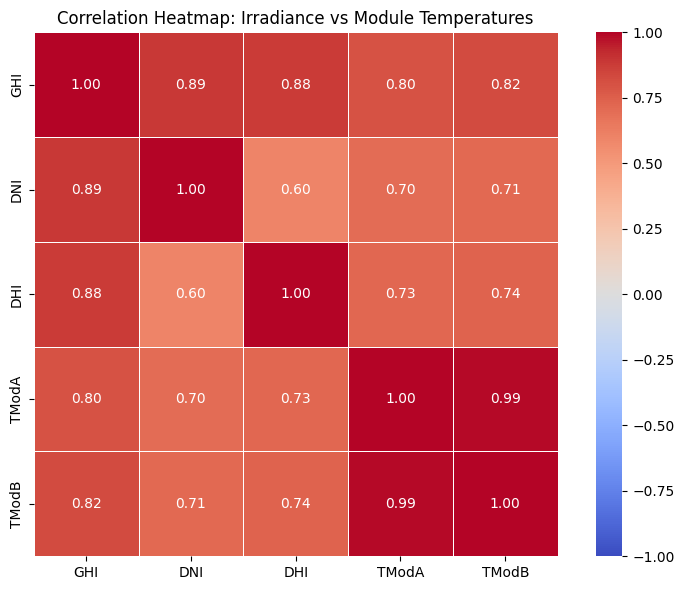

In [109]:
# Heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, square=True, linewidths=0.5)
plt.title("Correlation Heatmap: Irradiance vs Module Temperatures")
plt.tight_layout()
plt.show()

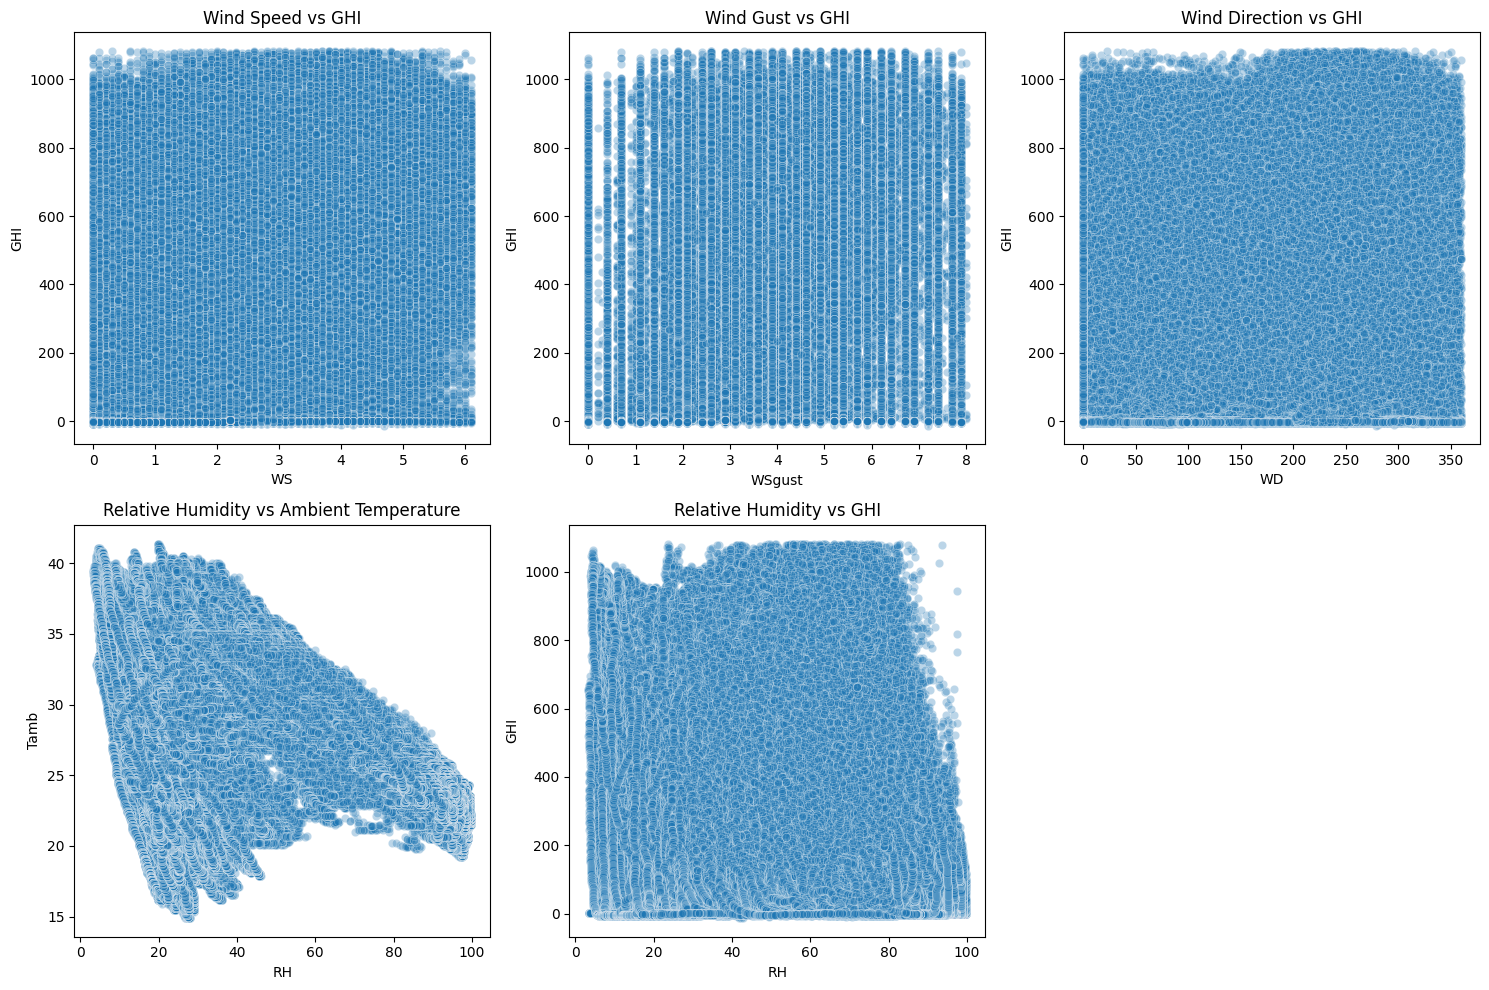

In [110]:
# Scatter plots
plt.figure(figsize=(15, 10))

# WS vs GHI
plt.subplot(2, 3, 1)
sns.scatterplot(data=df, x="WS", y="GHI", alpha=0.3)
plt.title("Wind Speed vs GHI")

# WSgust vs GHI
plt.subplot(2, 3, 2)
sns.scatterplot(data=df, x="WSgust", y="GHI", alpha=0.3)
plt.title("Wind Gust vs GHI")

# WD vs GHI
plt.subplot(2, 3, 3)
sns.scatterplot(data=df, x="WD", y="GHI", alpha=0.3)
plt.title("Wind Direction vs GHI")

# RH vs Tamb
plt.subplot(2, 3, 4)
sns.scatterplot(data=df, x="RH", y="Tamb", alpha=0.3)
plt.title("Relative Humidity vs Ambient Temperature")

# RH vs GHI
plt.subplot(2, 3, 5)
sns.scatterplot(data=df, x="RH", y="GHI", alpha=0.3)
plt.title("Relative Humidity vs GHI")

plt.tight_layout()
plt.show()

Wind & Distribution Analysis

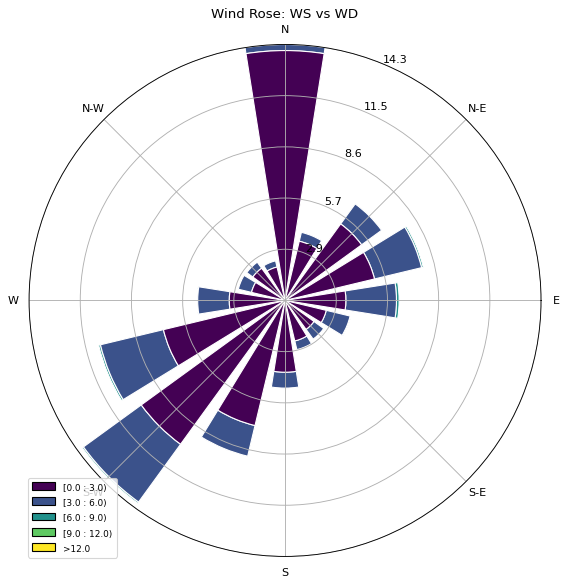

In [ ]:
from windrose import WindroseAxes

# Clean data (remove NaNs)
wind_df = df[["WS", "WD"]].dropna()

# Create wind rose
ax = WindroseAxes.from_ax()
ax.bar(wind_df["WD"], wind_df["WS"], normed=True, opening=0.8, edgecolor='white', bins=np.arange(0, 15, 3))
ax.set_legend()
plt.title("Wind Rose: WS vs WD")
plt.show()

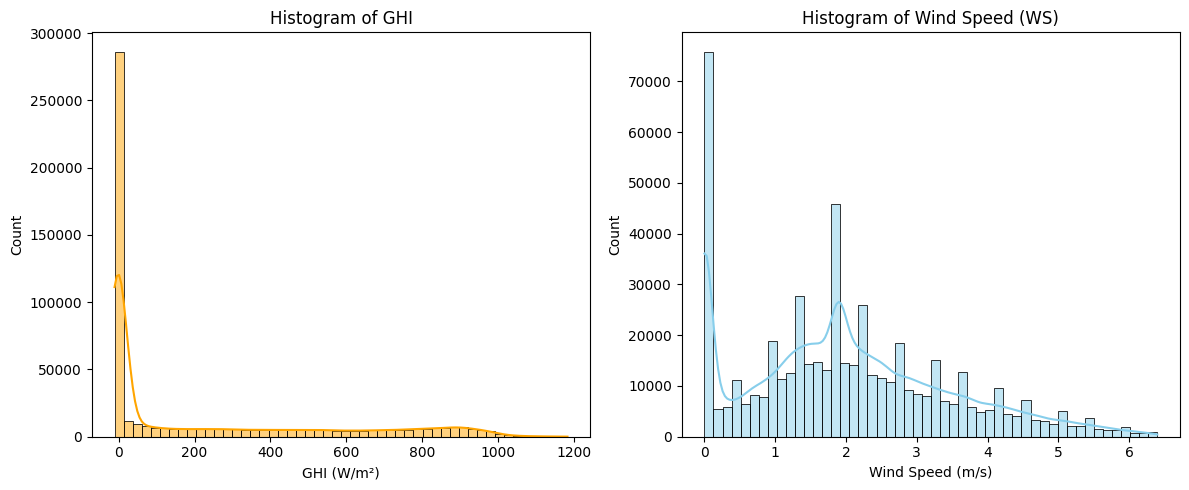

In [67]:
# Histograms for GHI and one other variable
plt.figure(figsize=(12, 5))

# Histogram for GHI
plt.subplot(1, 2, 1)
sns.histplot(df["GHI"], bins=50, kde=True, color="orange")
plt.title("Histogram of GHI")
plt.xlabel("GHI (W/m²)")

# Histogram for WS
plt.subplot(1, 2, 2)
sns.histplot(df["WS"], bins=50, kde=True, color="skyblue")
plt.title("Histogram of Wind Speed (WS)")
plt.xlabel("Wind Speed (m/s)")

plt.tight_layout()
plt.show()

Temperature Analysis


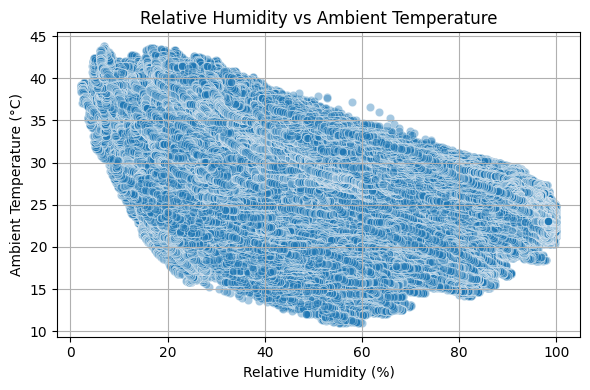

In [68]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x="RH", y="Tamb", alpha=0.4)
plt.title("Relative Humidity vs Ambient Temperature")
plt.xlabel("Relative Humidity (%)")
plt.ylabel("Ambient Temperature (°C)")
plt.grid(True)
plt.tight_layout()
plt.show()

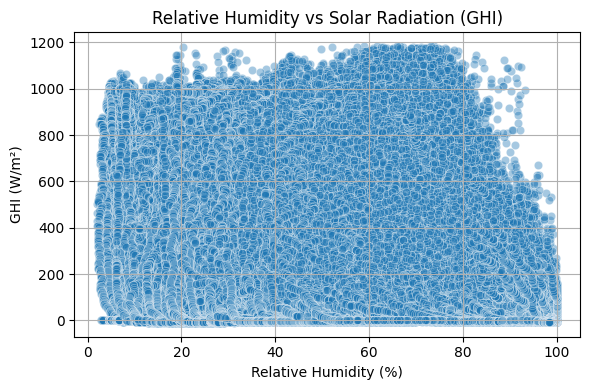

In [69]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x="RH", y="GHI", alpha=0.4)
plt.title("Relative Humidity vs Solar Radiation (GHI)")
plt.xlabel("Relative Humidity (%)")
plt.ylabel("GHI (W/m²)")
plt.grid(True)
plt.tight_layout()
plt.show()

Bubble Chart


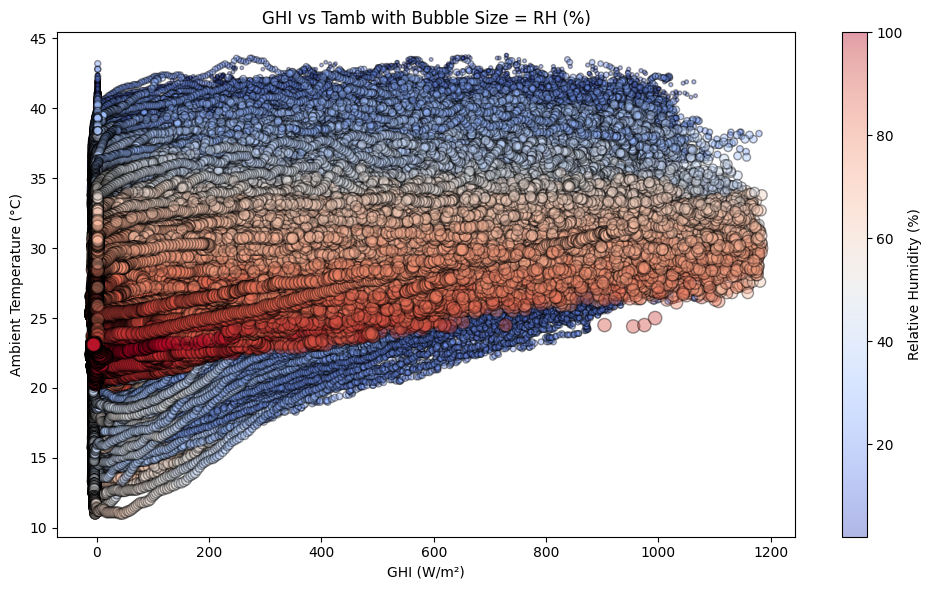

In [70]:
plt.figure(figsize=(10, 6))
plt.scatter(df["GHI"], df["Tamb"], 
            s=df["RH"],       # Bubble size
            c=df["RH"],       # Bubble color
            alpha=0.4, 
            cmap="coolwarm", 
            edgecolor="k")

plt.xlabel("GHI (W/m²)")
plt.ylabel("Ambient Temperature (°C)")
plt.title("GHI vs Tamb with Bubble Size = RH (%)")
plt.colorbar(label="Relative Humidity (%)")
plt.tight_layout()
plt.show()